In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format
import datetime as dt
import seaborn as sns
sns.set_context('talk')
import scipy.stats as stats
sns.set(style="ticks")
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data_importing

customers = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/CUSTOMERS.csv")
sellers = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/SELLERS.csv")
product = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/PRODUCTS.csv")
orders = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDERS.csv")
order_items = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_ITEMS.csv")
order_payments = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_PAYMENTS.csv")
reviews_rating = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_REVIEW_RATINGS.csv")
geo_location = pd.read_csv("5. Python Foundation End to End Case Study_E-Commerce Analytics Project/GEO_LOCATION.csv")

In [3]:
orderpayments_value=order_payments.groupby('order_id').payment_value.sum().reset_index()
order_review_rate_avg=reviews_rating.groupby('order_id').review_score.mean().reset_index()
data=orders.merge(orderpayments_value,on='order_id')
data=data.merge(customers,on='customer_id')
data=data.merge(order_items,how='left',on='order_id')
data=data.merge(product,how='left',on='product_id')
data=data.merge(sellers,how='left',on='seller_id')
data=data.merge(order_review_rate_avg,how='left',on='order_id')
data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,38.71,7c396fd4830fd04220f754e42b4e5bff,...,268.00,4.00,500.00,19.00,8.00,13.00,9350.00,Chhuikhadan,Chhattisgarh,4.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,141.46,af07308b275d755c9edb36a90c618231,...,178.00,1.00,400.00,19.00,13.00,19.00,31570.00,Anantapur,Andhra Pradesh,4.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,...,232.00,1.00,420.00,24.00,19.00,21.00,14840.00,Freelandgunj,Gujarat,5.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,72.20,7c142cf63193a1473d2e66489a9ae977,...,468.00,3.00,450.00,30.00,10.00,20.00,31842.00,Anantapur,Andhra Pradesh,5.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,...,316.00,4.00,250.00,51.00,15.00,15.00,8752.00,Akkayapalle,Andhra Pradesh,5.00


In [4]:
data=data.drop(columns=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date',
                        'order_delivered_customer_date','shipping_limit_date','product_name_lenght','product_description_lenght',
                        'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_height_cm',
                        'product_width_cm','seller_city','seller_state','seller_zip_code_prefix'])
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,Housewares,4.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,Perfumery,4.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,Auto,5.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,72.20,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,Pet_Shop,5.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1.00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,Stationery,5.00


In [5]:
data.order_purchase_timestamp=pd.to_datetime(data.order_purchase_timestamp)
data['year']=data.order_purchase_timestamp.dt.year
data['month']=data.order_purchase_timestamp.dt.month_name()
data['week'] = data.order_purchase_timestamp.dt.isocalendar().week
data['time']=data.order_purchase_timestamp.dt.time
data['day']=data.order_purchase_timestamp.dt.date
data['month_year']=data.order_purchase_timestamp.dt.date.astype(str).str[0:7]
data['price_to_pay']=data['price']+data['freight_value']
data.duplicated(['order_id','product_id','order_item_id']).sum()

0

#  1. Perform Detailed exploratory analysis        


# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [6]:
#total_categories
product['product_category_name'].nunique()

71

In [223]:
#total_products
product['product_id'].nunique()

32951

#TOTAL REVENUE : UNITS SOLD * PRICE OF PRODUCT 


In [156]:
#data= product[["product_id","product_photos_qty","product_category_name"]].merge(order_items[["product_id","order_id","price"]], on = "product_id", how="left")
#data.head(10)

In [7]:
order_items['price_to_pay']=order_items['price']+order_items['freight_value']
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_to_pay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,216.87


In [8]:
order_items.price_to_pay.sum()

15843553.24

In [46]:
#total_quantity

In [9]:
order_items.order_item_id.count()

112650

In [10]:
#total_geo_locations
#nunique retuens the number of unique values for each column.
customers['customer_zip_code_prefix'].nunique()

14994

In [11]:
#total_sellers
sellers['seller_id'].count()

3095

In [12]:
#total_payments_method
order_payments['payment_type'].value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [13]:
len(order_payments['payment_type'].value_counts())

5

# b . Understanding how many new customers acquired every month


In [14]:
# sort data by customer level
b=data.groupby(['order_id','customer_id']).last().reset_index()
customer_count_per_month=b.groupby(['month_year',b.customer_id.rename('customer')]).customer_id.count().reset_index()
customer_firstpurchase=b.groupby('customer_id').month_year.min().reset_index().rename(columns={'customer_id':'customer','month_year':'first_purchase_month'})
bfinal=customer_count_per_month.merge(customer_firstpurchase,on='customer')
bfinal.customer_id=np.where(bfinal.month_year==bfinal.first_purchase_month,'New','Old')
bfinal.head()

,month_year,customer,customer_id,first_purchase_month
0,2016-09,08c5351a6aca1c1589a38f244edeee9d,New,2016-09
1,2016-09,622e13439d6b5a0b486c435618b2679e,New,2016-09
2,2016-09,683c54fc24d40ee9f8a6fc179fd9856c,New,2016-09
3,2016-10,00474d2582fd72663036795b7ab8cfc1,New,2016-10
4,2016-10,01415cfeb907d8ce0e17075b4c097fe9,New,2016-10


In [15]:
bfinal.query('customer_id=="New"').groupby('month_year').customer_id.count()

month_year
2016-09       3
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Name: customer_id, dtype: int64

# c. Understand the retention of customers on month on month basis

In [16]:
bfinal.customer_id.value_counts()

New    99440
Name: customer_id, dtype: int64

In [17]:
data.customer_id.nunique()

99440

In [18]:
data.order_id.nunique()

99440

# d.how the revenues from existing/new customers on month on month basis

In [19]:
d = data.drop_duplicates('customer_id')

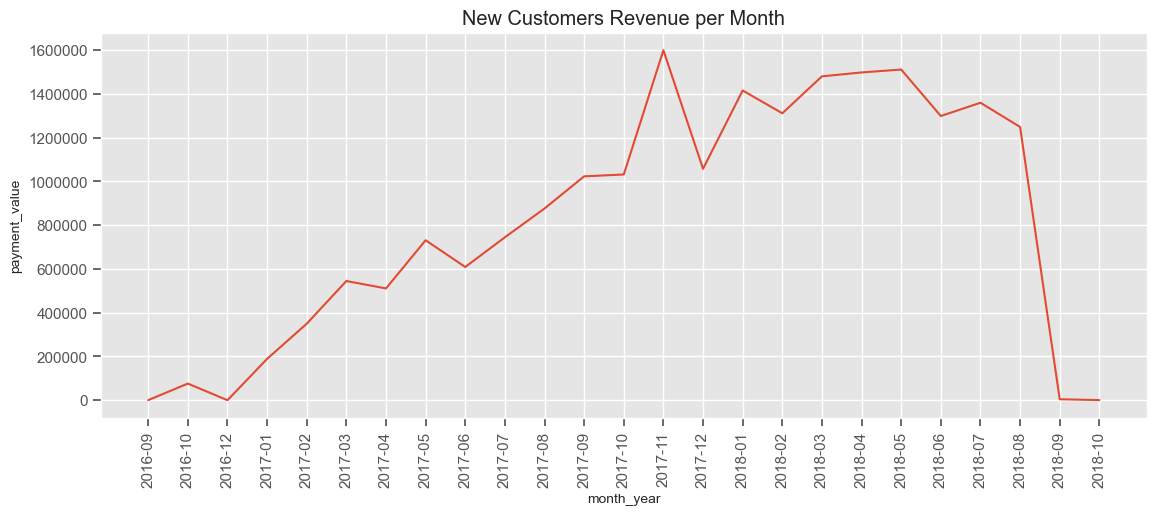

In [20]:
D = data.groupby('month_year').payment_value.sum().reset_index()

plt.figure(figsize=(13.5, 5))
sns.lineplot(x='month_year', y='payment_value', data=D)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('New Customers Revenue per Month')
plt.show()


# e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

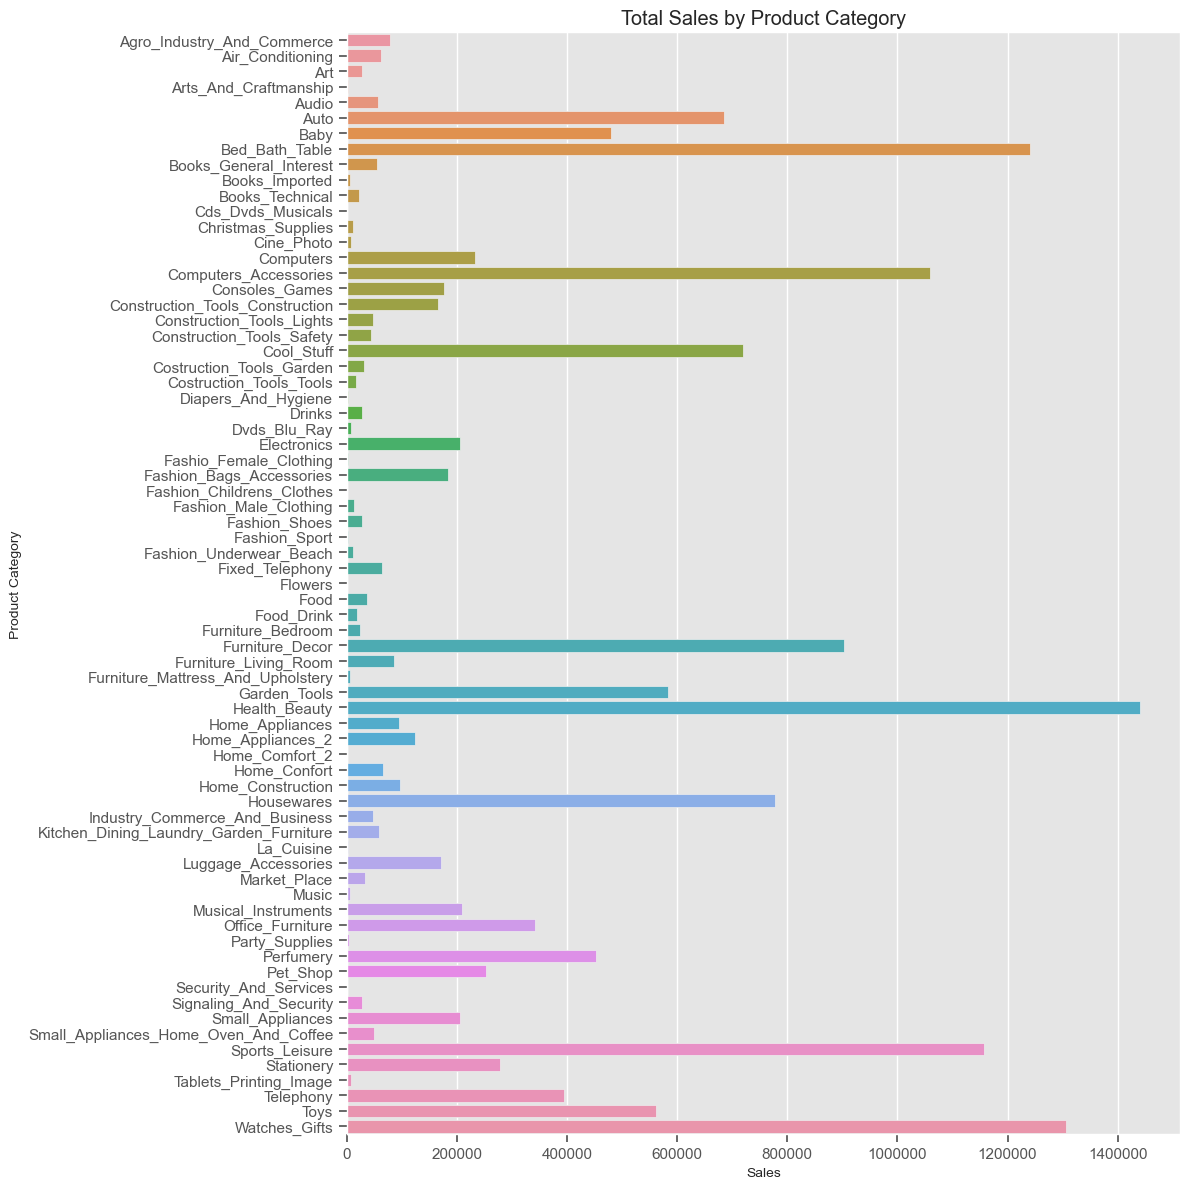

In [21]:
eplot1 = data.groupby('product_category_name').price_to_pay.sum().reset_index()

plt.figure(figsize=(12, 12))  # Increase the figure height to accommodate longer labels
sns.barplot(y='product_category_name', x='price_to_pay', data=eplot1, orient='h')
plt.xlabel('Sales')
plt.ylabel('Product Category')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Sales by Product Category')

plt.xticks()  # Rotate the y-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

plt.show()

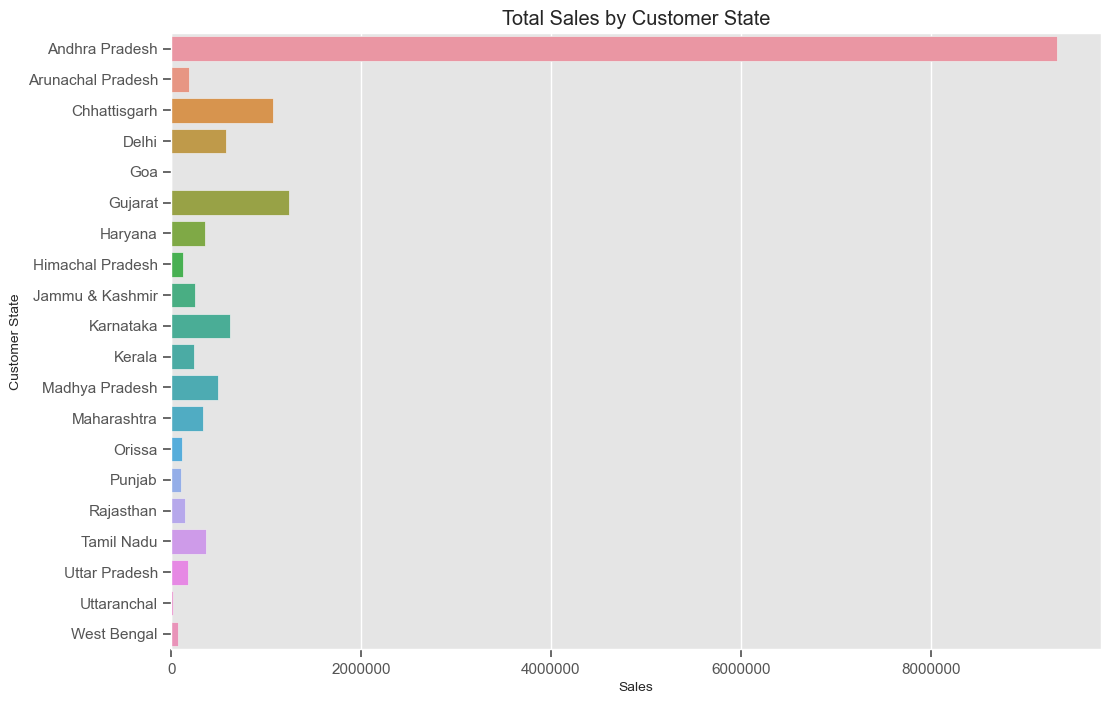

In [22]:
eplot2 = data.groupby('customer_state').price_to_pay.sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(y='customer_state', x='price_to_pay', data=eplot2, orient='h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sales')
plt.ylabel('Customer State')
plt.title('Total Sales by Customer State')
plt.show()

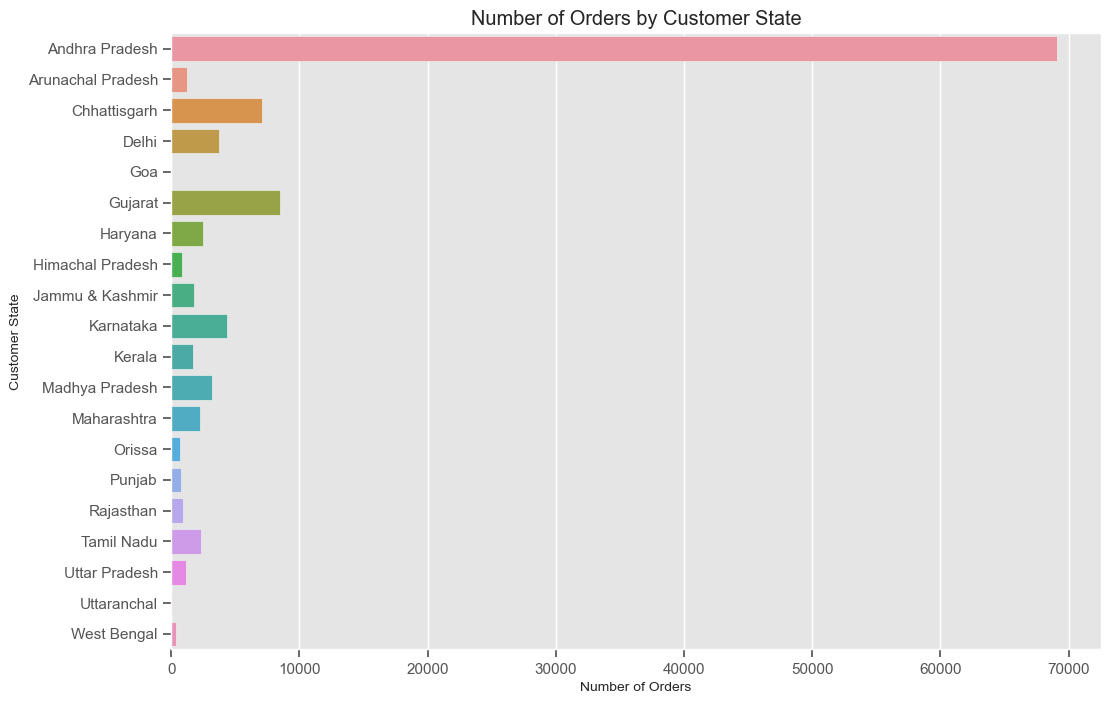

In [23]:
eplot3 = data.groupby('customer_state').order_item_id.count().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(y='customer_state', x='order_item_id', data=eplot3, orient='h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of Orders')
plt.ylabel('Customer State')
plt.title('Number of Orders by Customer State')
plt.show()

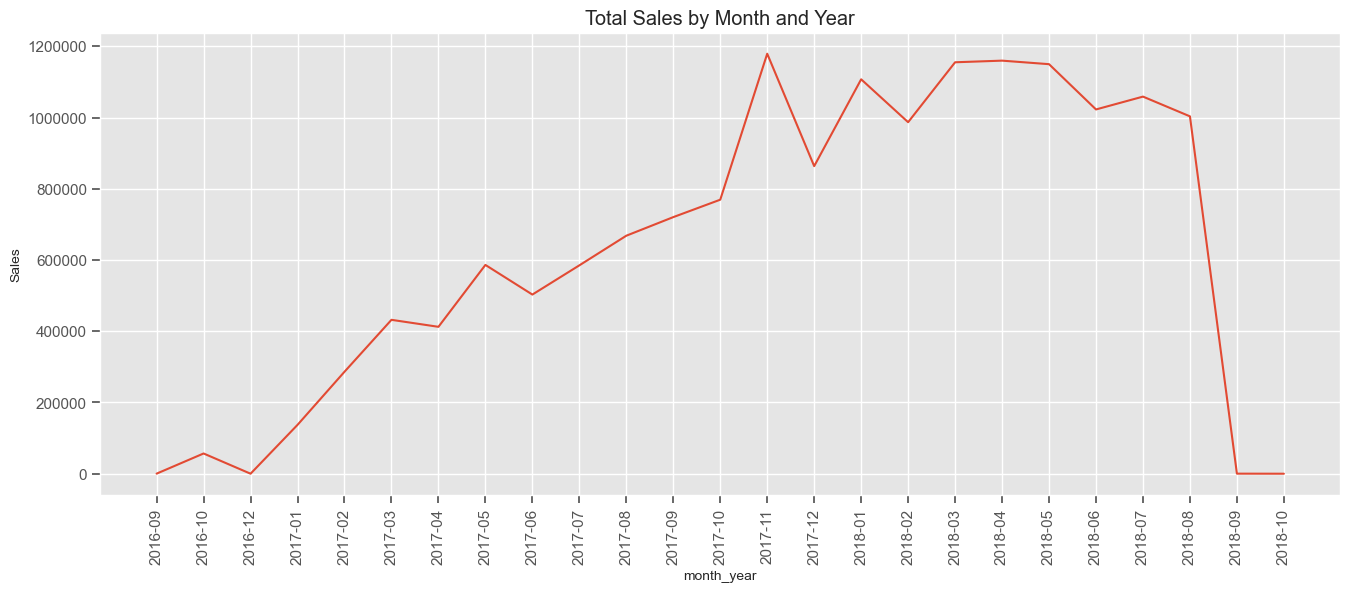

In [27]:
eplot4 = data.groupby('month_year').price_to_pay.sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='month_year', y='price_to_pay', data=eplot4)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.title('Total Sales by Month and Year')
plt.show()


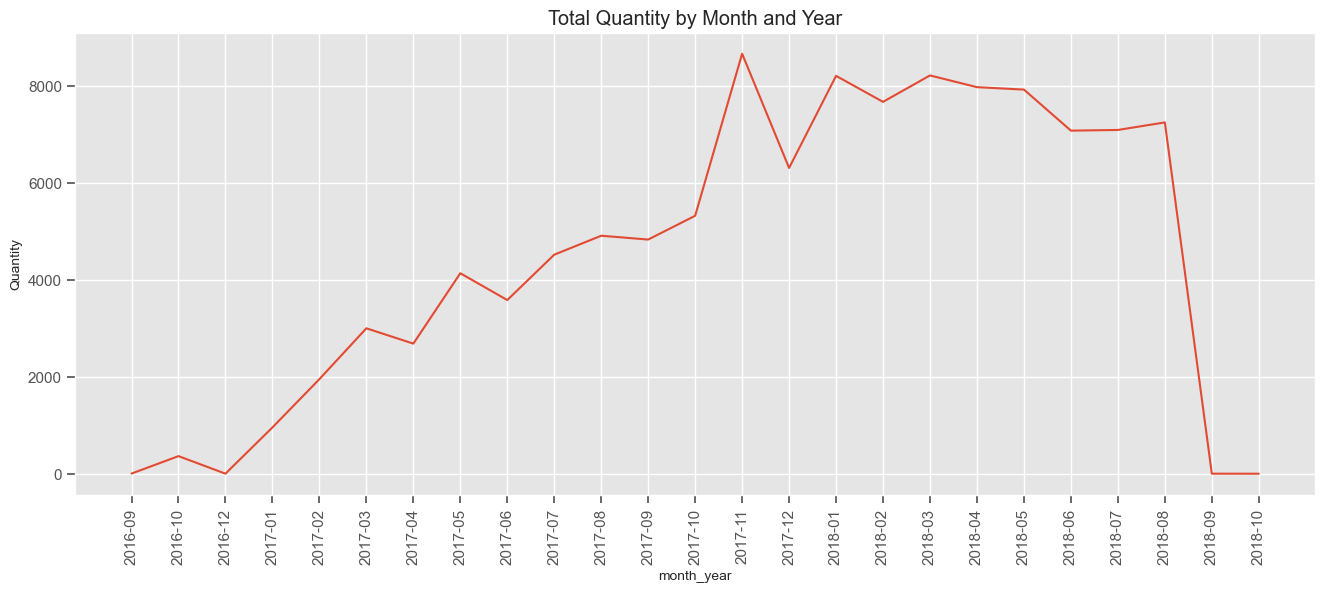

In [28]:
eplot5 = data.groupby('month_year').order_item_id.count().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='month_year', y='order_item_id', data=eplot5)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.title('Total Quantity by Month and Year')
plt.show()

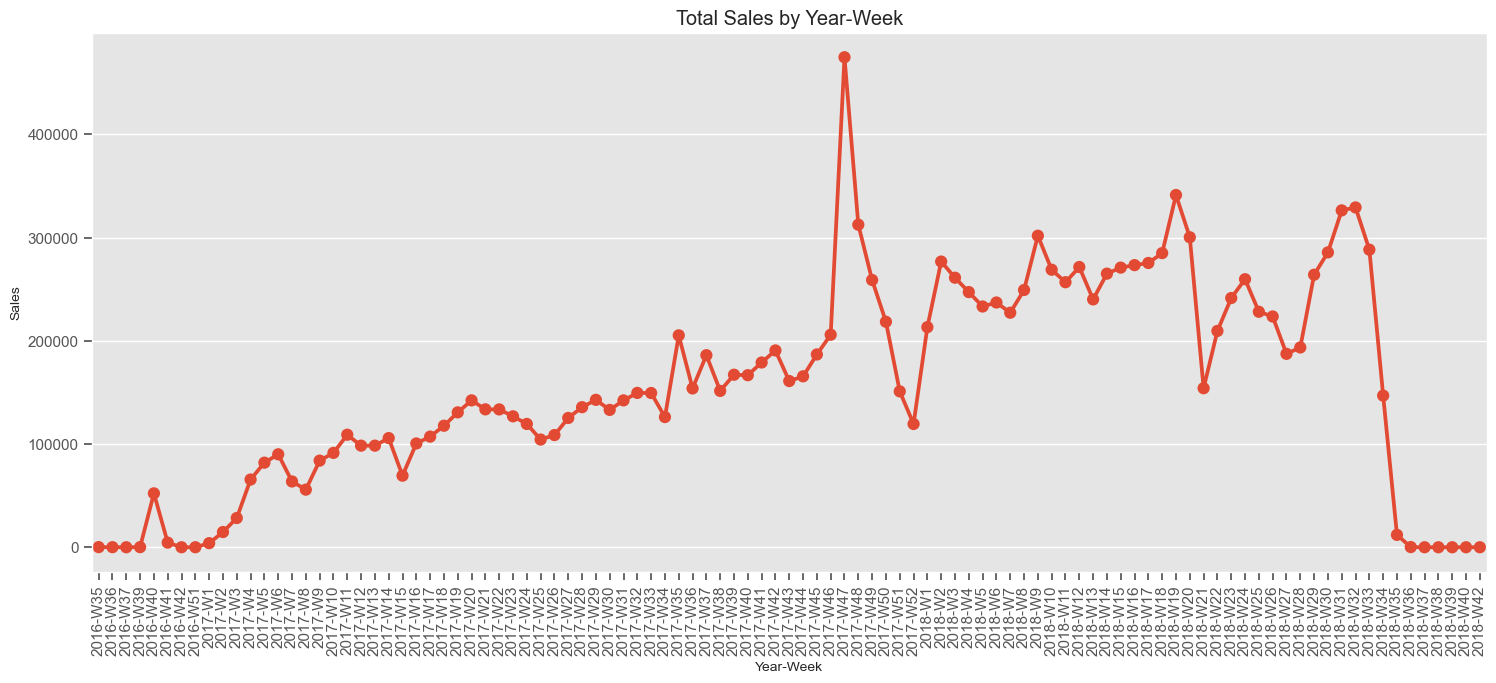

In [25]:
eplot6 = data.groupby(['year', 'week']).price_to_pay.sum().reset_index()
eplot6['year_week'] = eplot6['year'].astype(str) + '-W' + eplot6['week'].astype(str)

plt.figure(figsize=(18, 7))
sns.pointplot(x='year_week', y='price_to_pay', data=eplot6)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sales')
plt.xlabel('Year-Week')
plt.xticks(rotation=90)
plt.title('Total Sales by Year-Week')
plt.show()

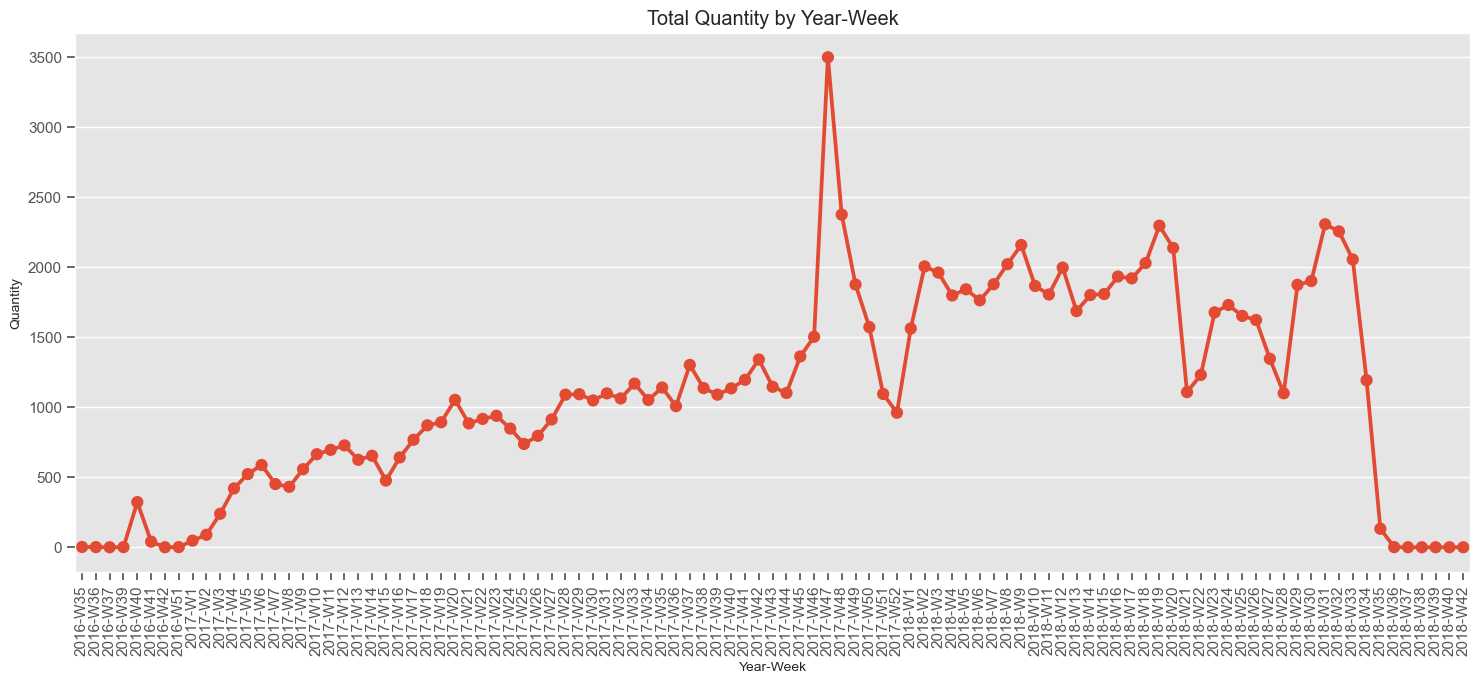

In [26]:
eplot7 = data.groupby(['year', 'week']).order_item_id.count().reset_index()
eplot7['year_week'] = eplot7['year'].astype(str) + '-W' + eplot7['week'].astype(str)

plt.figure(figsize=(18, 7))
sns.pointplot(x='year_week', y='order_item_id', data=eplot7)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Quantity')
plt.xlabel('Year-Week')
plt.xticks(rotation=90)
plt.title('Total Quantity by Year-Week')
plt.show()

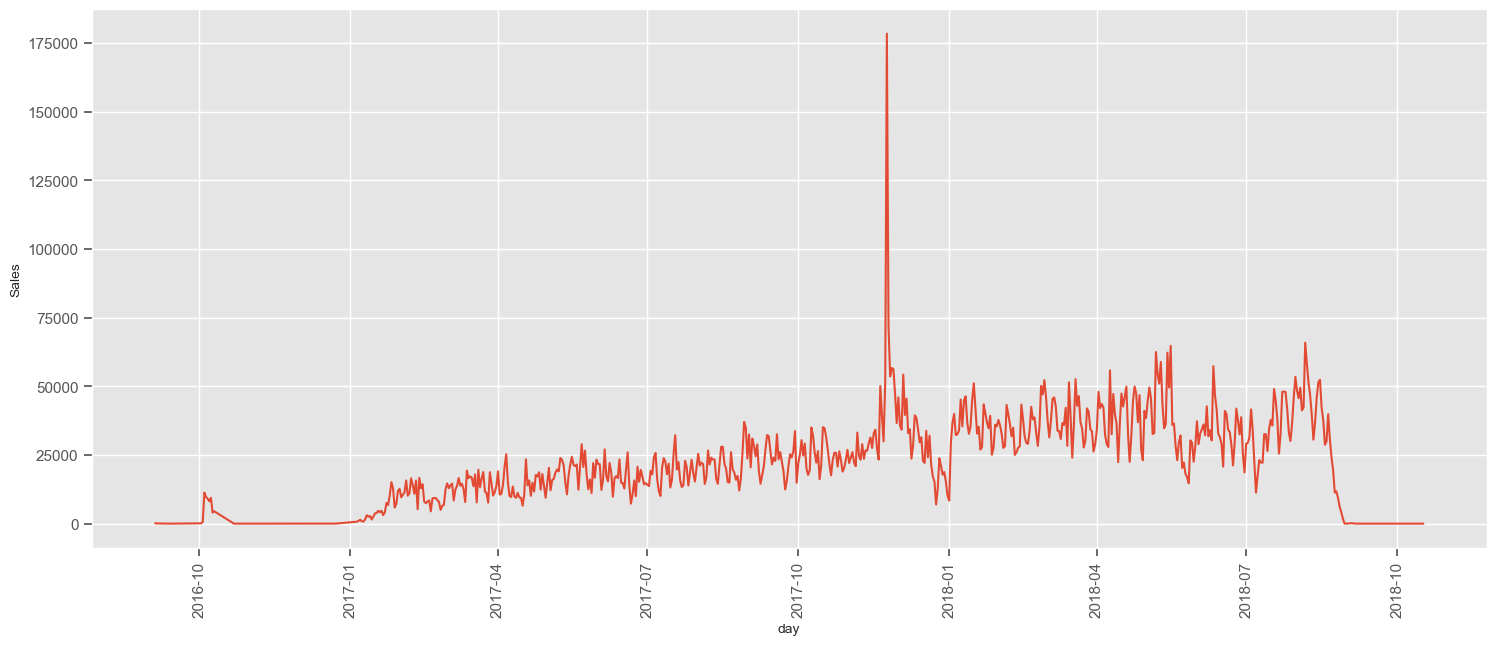

In [30]:
eplot8=data.groupby('day').price_to_pay.sum().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='price_to_pay',data=eplot8)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

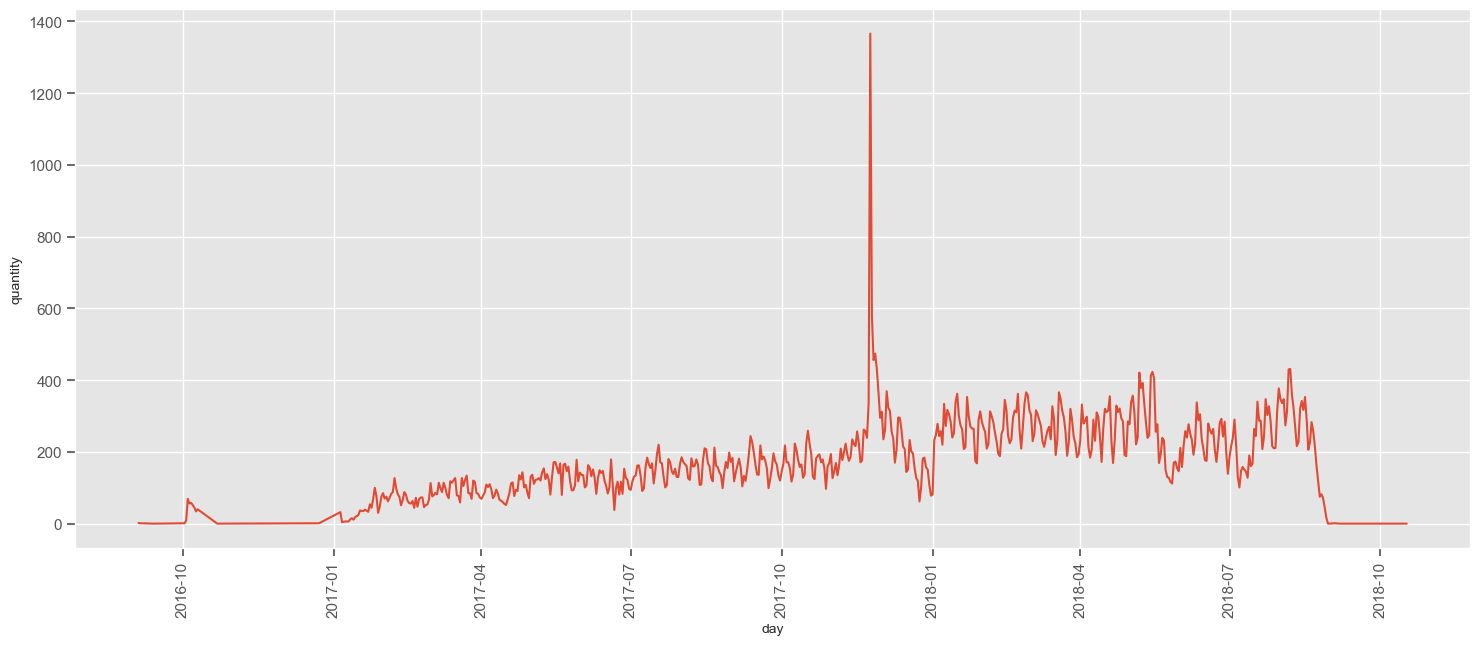

In [31]:
eplot9=data.groupby('day').order_item_id.count().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='order_item_id',data=eplot9)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

In [37]:
order_payments.payment_type.nunique()

5

In [38]:
order_payments.groupby('payment_type').payment_value.sum()

payment_type
UPI            2869361.27
credit_card   12542084.19
debit_card      217989.79
not_defined          0.00
voucher         379436.87
Name: payment_value, dtype: float64

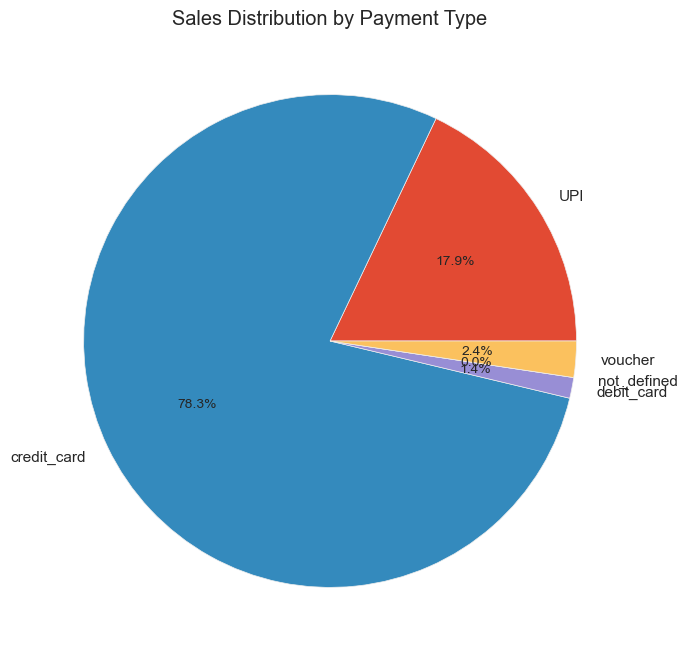

In [40]:
e11 = order_payments.groupby('payment_type').payment_value.sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(e11['payment_value'], labels=e11['payment_type'], autopct='%1.1f%%')
plt.title('Sales Distribution by Payment Type')
plt.show()

# f. Popular Products by month, seller, state, category.

In [41]:
f1=data.groupby(['month_year',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['month_year','product_id'],ascending=[True,False])
f1=f1.groupby('month_year').head(5).reset_index(drop=True)
f1[['month_year','product']]

,month_year,product
0,2016-09,c1488892604e4ba5cff5b4eb4d595400
1,2016-09,f293394c72c9b5fafd7023301fc21fc2
2,2016-09,f3c2d01a84c947b078e32bbef0718962
3,2016-10,eba7488e1c67729f045ab43fac426f2e
4,2016-10,d9894482fba41f536a273ba2276d951f
...,...,...
105,2018-08,73326828aa5efe1ba096223de496f596
106,2018-08,19c91ef95d509ea33eda93495c4d3481
107,2018-08,3fbc0ef745950c7932d5f2a446189725
108,2018-08,a92930c327948861c015c919a0bcb4a8


In [42]:
f2=data.groupby(['seller_id',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])
f2=f2.groupby('seller_id').head(5).reset_index(drop=True)
f2[['seller_id','product']]

,seller_id,product
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e
2,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580
3,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4
4,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39
...,...,...
10367,ffff564a4f9085cd26170f4732393726,8f7a3322e1abfed89ac080b0f7364779
10368,ffff564a4f9085cd26170f4732393726,96aca2f53bcaed6f466449f7fb18ae75
10369,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129
10370,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9


In [44]:
f3=data.groupby(['customer_state',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])
f3=f3.groupby('customer_state').head(5).reset_index(drop=True)
f3[['customer_state','product']]

,customer_state,product
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af
1,Andhra Pradesh,99a4788cb24856965c36a24e339b6058
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d
3,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08
4,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b
...,...,...
95,West Bengal,99a4788cb24856965c36a24e339b6058
96,West Bengal,30ac6df06dc59ad72cf2f158fc2d904c
97,West Bengal,389d119b48cf3043d311335e499d9c6b
98,West Bengal,ffaf0af7eebb57c7f262b51ebb05dfd6


In [45]:
f4=data.groupby(['product_category_name',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])
f4=f4.groupby('product_category_name').head(5).reset_index(drop=True)
f4[['product_category_name','product']]

,product_category_name,product
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690
2,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd
3,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054
4,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44
...,...,...
343,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08
344,Watches_Gifts,a62e25e09e05e6faf31d90c6ec1aa3d1
345,Watches_Gifts,e0d64dcfaa3b6db5c54ca298ae101d05
346,Watches_Gifts,a92930c327948861c015c919a0bcb4a8


# g. Popular categories by state, month


In [46]:
g1=data.groupby(['customer_state',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])
g1=g1.groupby('customer_state').head(5).reset_index(drop=True)
g1[['customer_state','category']]

,customer_state,category
0,Andhra Pradesh,Bed_Bath_Table
1,Andhra Pradesh,Health_Beauty
2,Andhra Pradesh,Sports_Leisure
3,Andhra Pradesh,Furniture_Decor
4,Andhra Pradesh,Computers_Accessories
...,...,...
95,West Bengal,Health_Beauty
96,West Bengal,Telephony
97,West Bengal,Computers_Accessories
98,West Bengal,Bed_Bath_Table


In [47]:
g1=data.groupby(['month_year',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['month_year','product_category_name'],ascending=[True,False])
g1=g1.groupby('month_year').head(5).reset_index(drop=True)
g1[['month_year','category']]

,month_year,category
0,2016-09,Furniture_Decor
1,2016-09,Telephony
2,2016-10,Furniture_Decor
3,2016-10,Health_Beauty
4,2016-10,Perfumery
...,...,...
104,2018-08,Bed_Bath_Table
105,2018-08,Housewares
106,2018-08,Sports_Leisure
107,2018-08,Furniture_Decor


# h. List top 10 most expensive products sorted by price


In [48]:
#order_items.sort_values(by=['price'], ascending = False).head(10)
#order_items.price.sort_values(ascending=False).head(10)

In [49]:
expensive = data.groupby(['product_id'])['price'].mean()
expensive.sort_values(ascending = False).head(10).reset_index().product_id

0    489ae2aa008f021502940f251d4cce7f
1    69c590f7ffc7bf8db97190b6cb6ed62e
2    1bdf5e6731585cf01aa8169c7028d6ad
3    a6492cc69376c469ab6f61d8f44de961
4    c3ed642d592594bb648ff4a04cee2747
5    259037a6a41845e455183f89c5035f18
6    a1beef8f3992dbd4cd8726796aa69c53
7    6cdf8fc1d741c76586d8b6b15e9eef30
8    6902c1962dd19d540807d0ab8fade5c6
9    4ca7b91a31637bd24fb8e559d5e015e4
Name: product_id, dtype: object

# 2. Performing Customers/sellers Segmentation : 

a. Divide the customers into groups based on the revenue generated 

b. Divide the sellers into groups based on the revenue generated 

In [51]:
a2=data.groupby('customer_id').price_to_pay.sum().reset_index()
a2['Group_number']=pd.qcut(a2['price_to_pay'],10,labels=False)
a2[['customer_id','Group_number']]

,customer_id,Group_number
0,00012a2ce6f8dcda20d059ce98491703,5
1,000161a058600d5901f007fab4c27140,2
2,0001fd6190edaaf884bcaf3d49edf079,7
3,0002414f95344307404f0ace7a26f1d5,7
4,000379cdec625522490c315e70c7a9fb,5
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,3
99436,fffeda5b6d849fbd39689bb92087f431,2
99437,ffff42319e9b2d713724ae527742af25,8
99438,ffffa3172527f765de70084a7e53aae8,1


In [53]:
#b. Divide the sellers into groups based on the revenue generated

b2=data.groupby('seller_id').price_to_pay.sum().reset_index()
b2['Group_number']=pd.qcut(b2['price_to_pay'],10,labels=False)
b2[['seller_id','Group_number']]

,seller_id,Group_number
0,0015a82c2db000af6aaaf3ae2ecb0532,6
1,001cca7ae9ae17fb1caed9dfb1094831,9
2,001e6ad469a905060d959994f1b41e4f,2
3,002100f778ceb8431b7a1020ff7ab48f,6
4,003554e2dce176b5555353e4f3555ac8,1
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,0
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,6
3092,ffeee66ac5d5a62fe688b9d26f83f534,6
3093,fffd5413c0700ac820c7069d66d98c89,9


In [54]:
data.product_id.nunique()

32951

# 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)



In [55]:
#product.head()

In [57]:
cs=data.groupby(['order_id','product_id']).order_item_id.count().reset_index()
cs=pd.crosstab(data.order_id,data.product_category_name)
function=lambda x: True if x>0 else False
for i in cs.columns:
    cs[i]=cs[i].apply(function)
cs.head()

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
000229ec398224ef6ca0657da4fc703e,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Payment Behaviour
a. How customers are paying?

b. Which payment channels are used by most customers?

In [60]:
# a.how customers are paying
order_payments['payment_type'].value_counts()
#different payments method

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

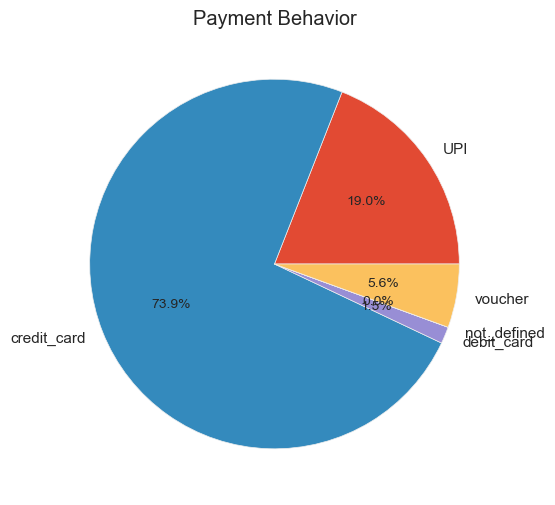

In [61]:
payment_behavior = order_payments.merge(orders, on='order_id')
a4 = payment_behavior.groupby('payment_type').customer_id.count().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(a4.customer_id, labels=a4.payment_type, autopct='%1.1f%%')
plt.title('Payment Behavior')
plt.show()

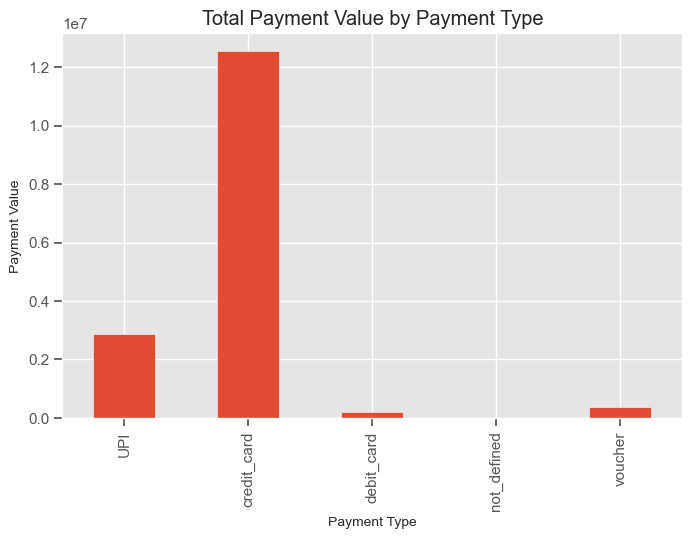

In [63]:
#b Which payment channels are used by most customers?
plt.figure(figsize=(8, 5))  # Set the figure size to 8 inches wide and 5 inches tall
payment_behavior.groupby('payment_type').payment_value.sum().plot.bar()
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.title('Total Payment Value by Payment Type')
plt.xticks(rotation=90)
plt.show()

# 5. Customer satisfaction towards category & product
a. Which categories (top 10) are maximum rated & minimum rated?

b. Which products (top10) are maximum rated & minimum rated?

c. Average rating by location, seller, product, category, month etc.

 a. Which categories (top 10) are maximum rated & minimum rated?

In [64]:
category_ratings=data.groupby('product_category_name').review_score.mean().reset_index().sort_values(by='review_score')
# top 10 min rated
category_ratings.head(10)

,product_category_name,review_score
61,Security_And_Services,2.50
23,Diapers_And_Hygiene,3.26
46,Home_Comfort_2,3.37
57,Office_Furniture,3.48
30,Fashion_Male_Clothing,3.62
34,Fixed_Telephony,3.67
58,Party_Supplies,3.77
27,Fashio_Female_Clothing,3.78
52,La_Cuisine,3.79
4,Audio,3.81


In [65]:
# top 10 max rated
category_ratings.tail(10)

,product_category_name,review_score
32,Fashion_Sport,4.23
37,Food_Drink,4.30
64,Small_Appliances_Home_Oven_And_Coffee,4.30
53,Luggage_Accessories,4.31
10,Books_Technical,4.33
22,Costruction_Tools_Tools,4.36
9,Books_Imported,4.40
8,Books_General_Interest,4.44
29,Fashion_Childrens_Clothes,4.50
11,Cds_Dvds_Musicals,4.64


 b.Which products (top10) are maximum rated & minimum rated?

In [66]:
y =data.groupby(['product_id'])[['review_score']].count().sort_values(by='review_score',ascending=False)
y.head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,281


In [67]:
y.tail(10)

,review_score
product_id,
6c96a2727d7c8e30804367b7341c7b9c,1
6caea101e4c5049412e73cd5e6c03876,1
6cad28878d72af7730d0956a292fa125,1
6caa2580a19d609683ae770f296f7524,1
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1
6ca32b4631431cb1fe976880797a0f5c,1
6ca1597b8e5f2618c47b414b68094450,1


c. Average rating by location, seller, product, category, month etc

In [69]:
# data at customer level
c1=data.groupby(['order_id','customer_id']).last().reset_index()
c1.groupby('customer_state').review_score.mean().reset_index()

,customer_state,review_score
0,Andhra Pradesh,4.05
1,Arunachal Pradesh,4.11
2,Chhattisgarh,4.09
3,Delhi,4.06
4,Goa,4.80
5,Gujarat,4.08
6,Haryana,4.15
7,Himachal Pradesh,4.02
8,Jammu & Kashmir,4.08
9,Karnataka,4.07


In [70]:
# getting data at product and seller level:
c2=data.groupby(['order_id','product_id','seller_id']).last().reset_index()
c2.groupby('seller_id').review_score.mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.67
1,001cca7ae9ae17fb1caed9dfb1094831,3.94
2,001e6ad469a905060d959994f1b41e4f,1.00
3,002100f778ceb8431b7a1020ff7ab48f,3.98
4,003554e2dce176b5555353e4f3555ac8,5.00
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.00
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.33
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.21
3093,fffd5413c0700ac820c7069d66d98c89,3.87


In [72]:
# getting data at product  level:
c3=data.groupby(['order_id','product_id']).last().reset_index()
c3.groupby('product_id').review_score.mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.00
1,00088930e925c41fd95ebfe695fd2655,4.00
2,0009406fd7479715e4bef61dd91f2462,1.00
3,000b8f95fcb9e0096488278317764d19,5.00
4,000d9be29b5207b54e86aa1b1ac54872,5.00
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.50
32947,fff81cc3158d2725c0655ab9ba0f712c,4.00
32948,fff9553ac224cec9d15d49f5a263411f,5.00
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.00


In [73]:
# getting data at product  level:
c4=data.groupby(['order_id','product_id']).last().reset_index()
c4.groupby('product_category_name').review_score.mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.03
1,Air_Conditioning,3.98
2,Art,4.00
3,Arts_And_Craftmanship,4.12
4,Audio,3.82
...,...,...
66,Stationery,4.22
67,Tablets_Printing_Image,4.08
68,Telephony,3.97
69,Toys,4.16


In [75]:
# getting data at product  level:
c5=data.groupby(['order_id','product_id']).last().reset_index()
c5.groupby('month_year').review_score.mean().reset_index()

,month_year,review_score
0,2016-09,1.00
1,2016-10,3.60
2,2016-12,5.00
3,2017-01,4.06
4,2017-02,4.05
5,2017-03,4.08
6,2017-04,4.03
7,2017-05,4.14
8,2017-06,4.13
9,2017-07,4.16
